In [19]:
import pandas as pd
from uta import solve_lp_problem, plot_utility_functions, create_full_ranking_df, check_consistency, obtain_relations

In [20]:
df = pd.read_csv('Nuclear waste management.csv', index_col=0)

In [21]:
preferential_information = [(5, 1), (11, 24), (14, 27)]
indifference_information = [(3, 7), (22, 23)]

In [23]:
problem, u_vars, criteria, breakpoints = solve_lp_problem(df, preferential_information, indifference_information, verbose=False)

Wszystkie alternatywy: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Alternatywy referencyjne: [1, 3, 5, 7, 11, 14, 22, 23, 24, 27]
Kryteria: ['C1', 'C2', 'C3', 'C4']
Stworzono zmienną decyzyjną: epsilon o dolnym ograniczeniu 0
Dodano funkcję celu: epsilon
Dodano ograniczenia wynikające z rankingu referencyjnego
Dodano ograniczenia wynikające z normalizacji i nieujemnosci
Dodano ograniczenia wynikające z monotoniczności
Ostateczny problem do rozwiązania:
Status: Optimal


{'C1': {0.6: 0.17, 0.66: 0.17, 1.0: 0.0, 0.48: 0.17, 0.62: 0.17, 0.78: 0.0, 0.4: 0.17, 0.64: 0.17, 0.65: 0.17, 0.45: 0.17, 0.61: 0.17, 0.74: 0.0, 0.69: 0.17, 0.87: 0.0, 0.44: 0.17, 0.68: 0.17, 0.76: 0.0, 0.35: 0.2, 0.83: 0.0, 0.32: 0.2, 0.59: 0.17, 0.73: 0.0, 0.34: 0.2, 0.71: 0.17, 0.8: 0.0}, 'C2': {0.93: 0.0, 0.55: 0.0, 0.45: 0.0, 0.87: 0.0, 0.4: 0.18, 0.27: 0.18, 0.9: 0.0, 0.44: 0.18, 0.3: 0.18, 0.86: 0.0, 0.54: 0.0, 0.25: 0.18, 0.97: 0.0, 0.49: 0.0, 0.03: 0.18, 0.95: 0.0, 0.06: 0.18, 0.91: 0.0, 0.22: 0.18, 0.83: 0.0, 0.24: 0.18, 1.0: 0.0}, 'C3': {0.0: 0.3, 0.45: 0.3, 0.57: 0.15, 0.56: 0.3, 0.71: 0.15, 0.54: 0.3, 0.38: 0.3, 0.8: 0.15, 1.0: 0.0, 0.65: 0.15, 0.81: 0.15, 0.7: 0.15, 0.88: 0.0}, 'C4': {0.73: 0.0, 0.49: 0.32, 0.5: 0.32, 0.75: 0.0, 0.82: 0.0, 0.54: 0.32, 0.55: 0.32, 0.91: 0.0, 0.61: 0.32, 0.9: 0.0, 0.6: 0.32, 0.98: 0.0, 0.65: 0.0, 0.94: 0.0, 0.63: 0.0, 1.0: 0.0, 0.67: 0.0}}


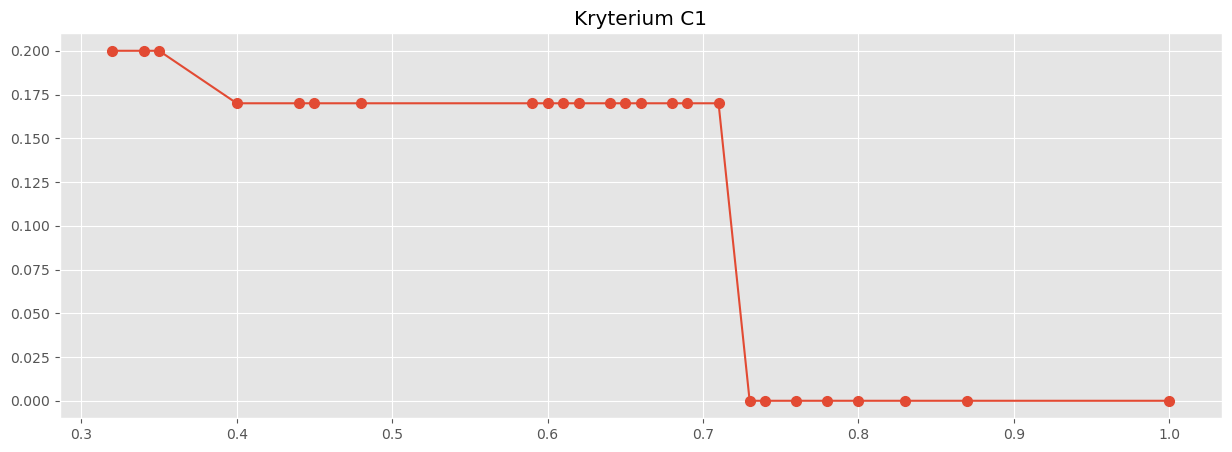

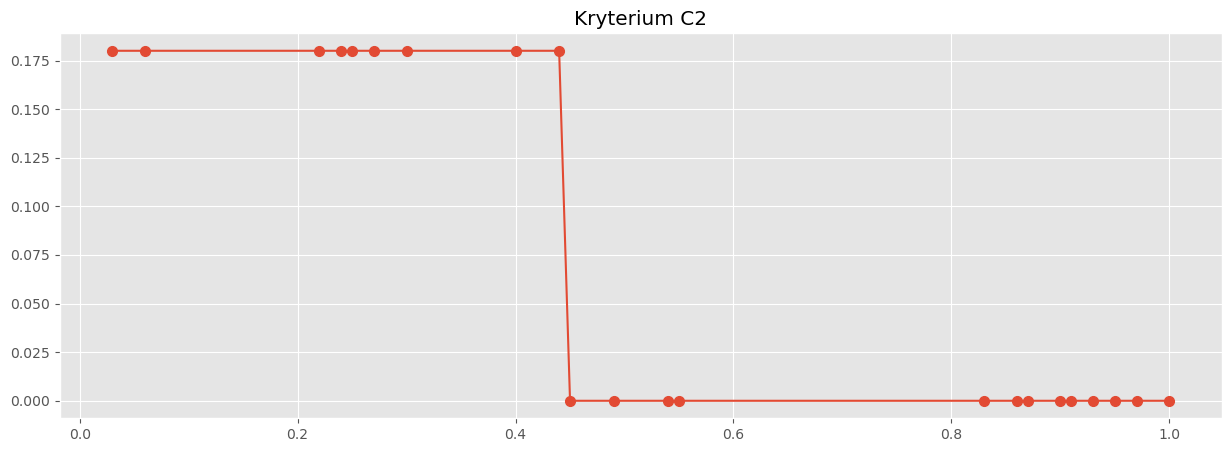

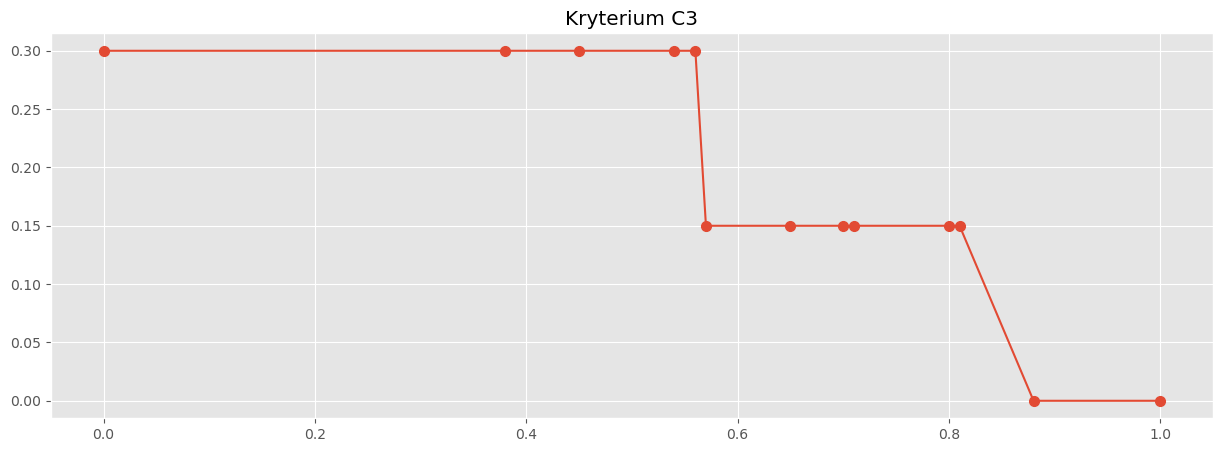

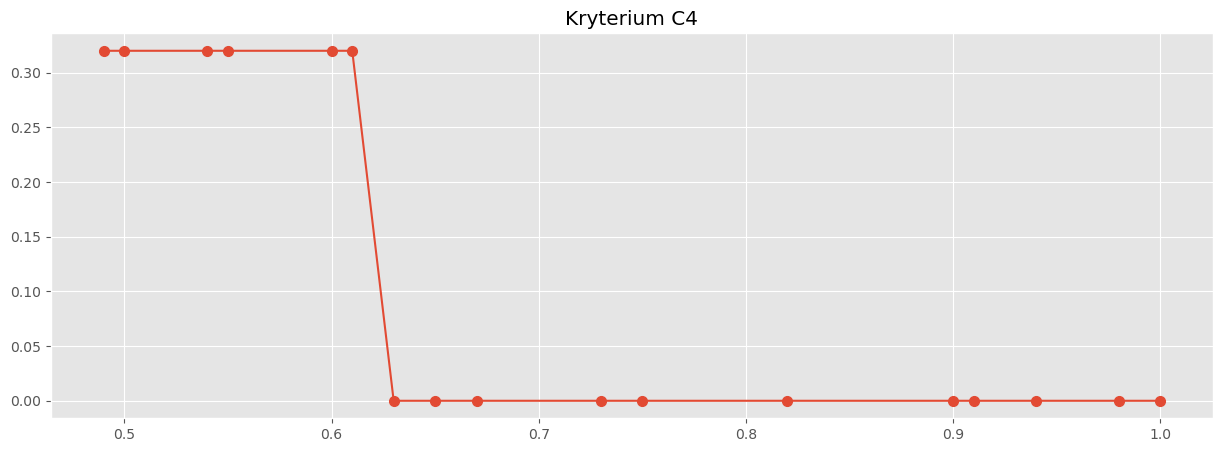

In [24]:
plot_utility_functions(problem, u_vars, criteria, breakpoints)

Brzydki ostatni wykres - inne wartosci f.uzytecznosci czastk. dla wariantow majacych taka sama wartosc na danym kryterium - dziwne, ale na slajdach w ten sposob jest problem formułowany (nierówność nieostra):

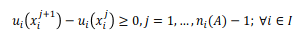

In [25]:
rank = create_full_ranking_df(df, problem, criteria)

In [26]:
check_consistency(rank, preferential_information, indifference_information)

True

In [27]:
rank.sort_values(by='U', ascending=False)

,C1,C2,C3,C4,u1,u2,u3,u4,U
5,0.62,0.40,0.56,0.50,0.17,0.18,0.3,0.32,0.97
8,0.64,0.44,0.54,0.54,0.17,0.18,0.3,0.32,0.97
17,0.68,0.40,0.65,0.60,0.17,0.18,0.15,0.32,0.82
9,0.65,0.30,0.71,0.55,0.17,0.18,0.15,0.32,0.82
14,0.69,0.49,0.56,0.61,0.17,0.0,0.3,0.32,0.79
11,0.61,0.54,0.38,0.49,0.17,0.0,0.3,0.32,0.79
2,0.66,0.55,0.45,0.49,0.17,0.0,0.3,0.32,0.79
6,0.78,0.27,0.71,0.50,0.0,0.18,0.15,0.32,0.65
12,0.74,0.25,0.80,0.49,0.0,0.18,0.15,0.32,0.65
23,0.59,0.24,0.70,0.63,0.17,0.18,0.15,0.0,0.5


In [28]:
necessarily_preferred, possibly_preffered = obtain_relations(rank)

In [30]:
all_alternatives = [v for s in preferential_information + indifference_information for v in s]

In [31]:
all_alternatives

[5, 1, 11, 24, 14, 27, 3, 7, 22, 23]

In [33]:
data = necessarily_preferred.copy()
data = {key: [val for val in values if val in all_alternatives] for key, values in data.items() if key in all_alternatives}

In [ ]:
edges = []
for node, successors in data.items():
    for successor in successors:
        edges.append((node, successor))

In [92]:
data

{1: [7],
 3: [],
 5: [1, 3, 7, 11, 14, 23, 24, 27],
 7: [1],
 11: [1, 3, 7, 14],
 14: [1, 3, 7, 11],
 22: [1, 7],
 23: [24, 27],
 24: [27],
 27: [24]}

In [93]:
to_delete = [(11,1)] # ...
ec = edges.copy()

for el in to_delete:
    index = ec.index(el)
    ec = ec[:index] + ec[index+1:]

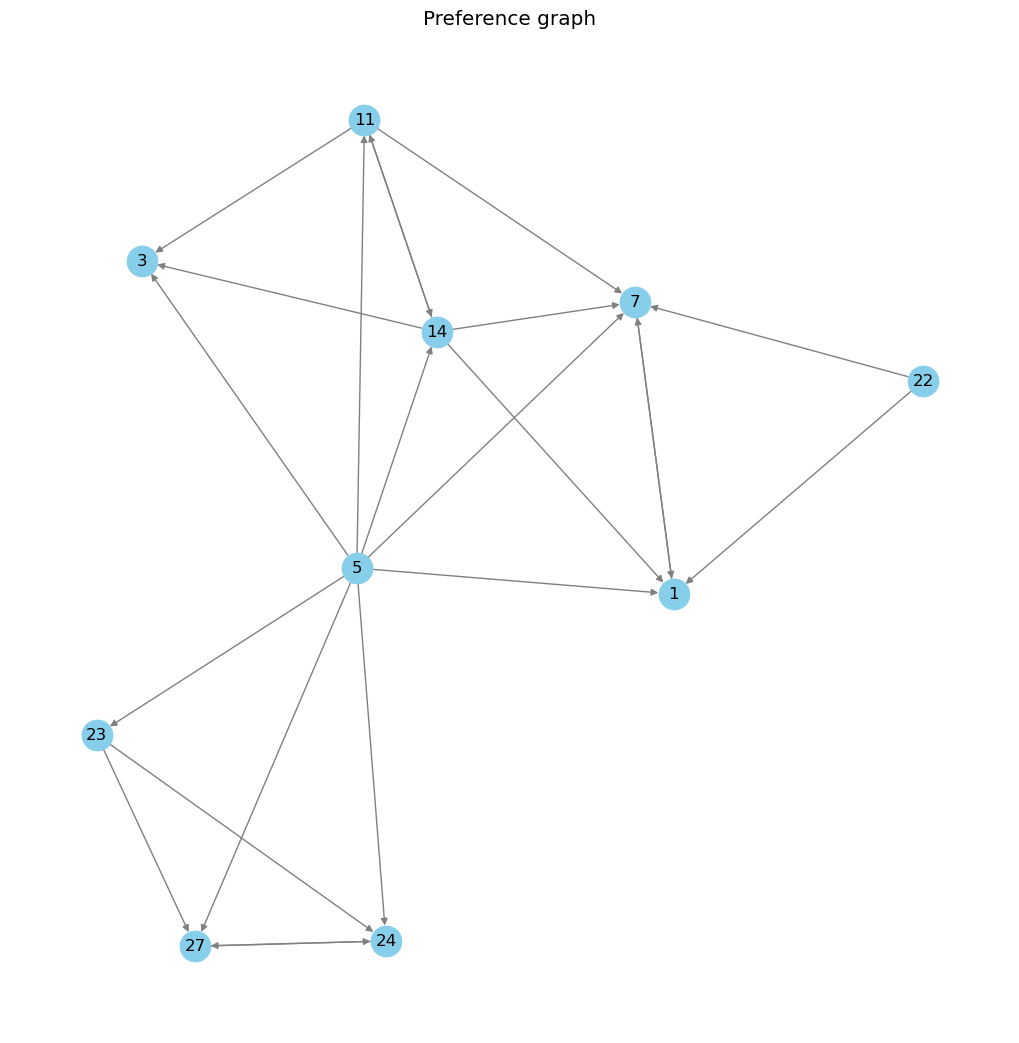

In [97]:
G = nx.DiGraph(ec)
pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw(G, pos, node_color='skyblue', edge_color='gray', with_labels=True, node_size=500)
plt.title("Preference graph")
plt.show()

In [ ]:
# pomysl: pokazmy tylko pozdbior tego grafu dla naszych wariantow ktore byly wyzglednione w informacji referencyjnej
# moge usunac te nadmiarowe krawedzie recznie nie mam pomyslu jak to inaczej zrobic
# wydaje sie to czytelniejsze I guess

In [67]:
preferential_information, indifference_information

([(5, 1), (11, 24), (14, 27)], [(3, 7), (22, 23)])